# **Machine Learning (ML) - Regression**
## **Project: Cinema Tickects Prediction**

# **Introduction**
### Cinema industry is not excluded from getting advantage of predictive modeling. Like other industry e.g., retail, banking, and restaurants, sale forecasts can help cinemas for cost reduction and better ROI. By forecasting sales, screening in different locations could be optimized as well as effective market targeting and pricing.


### We will answer some questions, which are:
* ### What is the most `tickets_sold`?
* ### Is the `total_sales` affects the `day_name`?
* ### Which `film_code` has the most `tickets_sold`?
* ### What is the correlation between `film_code` and `total_sales` in a day?
* ### Does `show_time` affect `tickets_sold`?
* ### Which `film_code` has the most popular `show_time`?

## **Data Features**
### **1. film_code**
Unique movie ID.

### **2. cinema_code**
Unique cinema ID.

### **3. total_sales**
Total sale per screening time

### **4. tickets_sold**
Number of tickets solds.

### **5. tickets_out**
Number of tickets cancelled.

### **6. show_time**
Screening time in each day.

### **7. occu_perc**
Occupation percent of cinema by means of available capacity.

### **8. ticket_price**
Price of ticket at show time.

### **9. ticket_use**
Total number of thicket used.

### **10. capacity**
Capacity of the cinema.

### **11. date**
Date of event.

### **12. month**
Month of event.

### **13. quarter**
Quarter of event.

### **14. day**
Day of event.

# **Part 1: Exploratory Data Analysis (EDA)**

### Download the dataset

The dataset called "Cinema Tickets", which contains 142,524 observations and 14 features. The most important one is `total_sales`, which we will in the machine learning model. 

you can download the dataset from [here](https://www.kaggle.com/arashnic/cinema-ticket)


### Import libraries and load the dataset

In [13]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import datetime
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge 
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.metrics import mean_squared_error, r2_score

In [14]:
df = pd.read_csv(r'C:\Users\surface laptop\Desktop\cinemaTicket_Ref.csv')
df.head()

,film_code,cinema_code,total_sales,tickets_sold,tickets_out,show_time,occu_perc,ticket_price,ticket_use,capacity,date,month,quarter,day
0,1492,304,3900000,26,0,4,4.26,150000.0,26,610.328638,2018-05-05,5,2,5
1,1492,352,3360000,42,0,5,8.08,80000.0,42,519.801980,2018-05-05,5,2,5
2,1492,489,2560000,32,0,4,20.00,80000.0,32,160.000000,2018-05-05,5,2,5
3,1492,429,1200000,12,0,1,11.01,100000.0,12,108.991826,2018-05-05,5,2,5
4,1492,524,1200000,15,0,3,16.67,80000.0,15,89.982004,2018-05-05,5,2,5


### Summary and statistical information on the dataset

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142524 entries, 0 to 142523
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   film_code     142524 non-null  int64  
 1   cinema_code   142524 non-null  int64  
 2   total_sales   142524 non-null  int64  
 3   tickets_sold  142524 non-null  int64  
 4   tickets_out   142524 non-null  int64  
 5   show_time     142524 non-null  int64  
 6   occu_perc     142399 non-null  float64
 7   ticket_price  142524 non-null  float64
 8   ticket_use    142524 non-null  int64  
 9   capacity      142399 non-null  float64
 10  date          142524 non-null  object 
 11  month         142524 non-null  int64  
 12  quarter       142524 non-null  int64  
 13  day           142524 non-null  int64  
dtypes: float64(3), int64(10), object(1)
memory usage: 15.2+ MB


In [16]:
df.describe()

,film_code,cinema_code,total_sales,tickets_sold,tickets_out,show_time,occu_perc,ticket_price,ticket_use,capacity,month,quarter,day
count,142524.000000,142524.000000,1.425240e+05,142524.000000,142524.000000,142524.000000,142399.000000,142524.000000,142524.000000,142399.000000,142524.000000,142524.000000,142524.000000
mean,1518.985111,320.378427,1.234728e+07,140.137570,0.237413,3.932103,19.965986,81234.599886,139.900157,854.723605,6.776852,2.634721,16.112585
std,36.184450,159.701229,3.065486e+07,279.758733,2.923206,3.056276,22.653445,33236.599278,279.564935,953.118103,2.195843,0.809692,8.949471
min,1471.000000,32.000000,2.000000e+04,1.000000,0.000000,1.000000,0.000000,483.870968,-219.000000,-2.000000,2.000000,1.000000,1.000000
25%,1485.000000,181.000000,1.260000e+06,18.000000,0.000000,2.000000,3.750000,60000.000000,18.000000,276.994486,5.000000,2.000000,8.000000
50%,1498.000000,324.000000,3.720000e+06,50.000000,0.000000,3.000000,10.350000,79454.235185,50.000000,525.714286,7.000000,3.000000,16.000000
75%,1556.000000,474.000000,1.110000e+07,143.000000,0.000000,5.000000,28.210000,100000.000000,143.000000,1038.961039,9.000000,3.000000,24.000000
max,1589.000000,637.000000,1.262820e+09,8499.000000,311.000000,60.000000,147.500000,700000.000000,8499.000000,9692.097160,11.000000,4.000000,31.000000


In [17]:
df.shape

(142524, 14)

In [18]:
df.isna().sum()

film_code         0
cinema_code       0
total_sales       0
tickets_sold      0
tickets_out       0
show_time         0
occu_perc       125
ticket_price      0
ticket_use        0
capacity        125
date              0
month             0
quarter           0
day               0
dtype: int64

### Drop rows that contain NaN values

In [19]:
# These features will not be used in this project because they will not add anything or have too many values, and may cause confusion and problems in the analysis
df.dropna(subset=['capacity'],inplace=True)
df.dropna(subset=['occu_perc'],inplace=True)

In [20]:
df.isna().sum()

film_code       0
cinema_code     0
total_sales     0
tickets_sold    0
tickets_out     0
show_time       0
occu_perc       0
ticket_price    0
ticket_use      0
capacity        0
date            0
month           0
quarter         0
day             0
dtype: int64

### Drop rows that contain irrational values in columns `ticket_use`, `capacity` and `occu_perc`

In [21]:
df = df[df['ticket_use'] >= 0]

In [22]:
df = df[df['capacity'] >= 0]

In [23]:
df = df[df['occu_perc'] <= 100]

In [24]:
df.describe()

,film_code,cinema_code,total_sales,tickets_sold,tickets_out,show_time,occu_perc,ticket_price,ticket_use,capacity,month,quarter,day
count,142120.000000,142120.000000,1.421200e+05,142120.000000,142120.000000,142120.000000,142120.000000,142120.000000,142120.000000,142120.000000,142120.000000,142120.000000,142120.00000
mean,1518.980988,320.265339,1.234894e+07,140.036631,0.212848,3.936223,19.881310,81276.054801,139.823783,855.751487,6.776513,2.634471,16.11370
std,36.180077,159.636011,3.065892e+07,279.771202,2.414932,3.058151,22.481873,33235.362939,279.562401,953.618471,2.194446,0.809148,8.94958
min,1471.000000,32.000000,2.000000e+04,1.000000,0.000000,1.000000,0.030000,483.870968,0.000000,10.000000,2.000000,1.000000,1.00000
25%,1485.000000,181.000000,1.275000e+06,18.000000,0.000000,2.000000,3.760000,60000.000000,18.000000,279.720280,5.000000,2.000000,8.00000
50%,1498.000000,324.000000,3.720000e+06,50.000000,0.000000,3.000000,10.340000,79513.677312,50.000000,526.315789,7.000000,3.000000,16.00000
75%,1556.000000,474.000000,1.110000e+07,143.000000,0.000000,5.000000,28.130000,100000.000000,143.000000,1039.826743,9.000000,3.000000,24.00000
max,1589.000000,566.000000,1.262820e+09,8499.000000,311.000000,60.000000,100.000000,700000.000000,8499.000000,9692.097160,11.000000,4.000000,31.00000


### Insert a column called `date`

In [25]:
df['date'] = pd.to_datetime(df['date'])

In [26]:
df['day_name'] = df['date'].dt.day_name()

In [27]:
df.head()

,film_code,cinema_code,total_sales,tickets_sold,tickets_out,show_time,occu_perc,ticket_price,ticket_use,capacity,date,month,quarter,day,day_name
0,1492,304,3900000,26,0,4,4.26,150000.0,26,610.328638,2018-05-05,5,2,5,Saturday
1,1492,352,3360000,42,0,5,8.08,80000.0,42,519.801980,2018-05-05,5,2,5,Saturday
2,1492,489,2560000,32,0,4,20.00,80000.0,32,160.000000,2018-05-05,5,2,5,Saturday
3,1492,429,1200000,12,0,1,11.01,100000.0,12,108.991826,2018-05-05,5,2,5,Saturday
4,1492,524,1200000,15,0,3,16.67,80000.0,15,89.982004,2018-05-05,5,2,5,Saturday


### Drop useless columns

In [28]:
df.drop(['month', 'quarter', 'day', 'tickets_out'], axis=1, inplace=True)

In [29]:
df.head()

,film_code,cinema_code,total_sales,tickets_sold,show_time,occu_perc,ticket_price,ticket_use,capacity,date,day_name
0,1492,304,3900000,26,4,4.26,150000.0,26,610.328638,2018-05-05,Saturday
1,1492,352,3360000,42,5,8.08,80000.0,42,519.801980,2018-05-05,Saturday
2,1492,489,2560000,32,4,20.00,80000.0,32,160.000000,2018-05-05,Saturday
3,1492,429,1200000,12,1,11.01,100000.0,12,108.991826,2018-05-05,Saturday
4,1492,524,1200000,15,3,16.67,80000.0,15,89.982004,2018-05-05,Saturday


### Change the column names to clearer names

In [30]:
df.rename(columns = {'occu_perc':'occupation'}, inplace=True)

In [31]:
df.head()

,film_code,cinema_code,total_sales,tickets_sold,show_time,occupation,ticket_price,ticket_use,capacity,date,day_name
0,1492,304,3900000,26,4,4.26,150000.0,26,610.328638,2018-05-05,Saturday
1,1492,352,3360000,42,5,8.08,80000.0,42,519.801980,2018-05-05,Saturday
2,1492,489,2560000,32,4,20.00,80000.0,32,160.000000,2018-05-05,Saturday
3,1492,429,1200000,12,1,11.01,100000.0,12,108.991826,2018-05-05,Saturday
4,1492,524,1200000,15,3,16.67,80000.0,15,89.982004,2018-05-05,Saturday


### How many `ticket_use` based on `occupation`?

In [32]:
df.groupby('occupation')[['ticket_use']].agg([sum]).sort_values(by=('ticket_use','sum'))

,ticket_use
,sum
occupation,
0.03,5
0.04,6
0.05,11
0.07,15
0.09,20
...,...
66.67,13888
16.67,15527


### What is the most `tickets_sold`?

In [33]:
df.groupby(['tickets_sold'], sort = True).sum()

,film_code,cinema_code,total_sales,show_time,occupation,ticket_price,ticket_use,capacity
tickets_sold,,,,,,,,
1,623465,143000,33225000,1021,242.61,3.322500e+07,406,1.806804e+05
2,3296778,781441,361050000,5181,2518.62,1.805250e+08,4298,8.940411e+05
3,2473993,580244,380990000,3832,2719.16,1.269967e+08,4831,7.092403e+05
4,3816933,886623,796902000,6168,5178.16,1.992255e+08,9950,1.097458e+06
5,3359522,775926,838625000,5240,5669.17,1.677250e+08,10961,9.802533e+05
...,...,...,...,...,...,...,...,...
7050,1554,448,563170000,38,91.19,7.988227e+04,7050,7.731111e+03
7121,1554,448,1058979995,38,85.80,1.487123e+05,7121,8.299534e+03
7229,1554,448,932559980,44,77.26,1.290026e+05,7229,9.356718e+03


### Is the `total_sales` affects the `day_name`?

In [34]:
df[['ticket_use', 'day_name']].groupby(['day_name'], sort = True).sum()

,ticket_use
day_name,
Friday,3693174
Monday,1402937
Saturday,2149174
Sunday,1624324
Thursday,3161169
Tuesday,5557986
Wednesday,2282992


### Which `day_name` has the most number of sales?

C:\Users\surface laptop\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


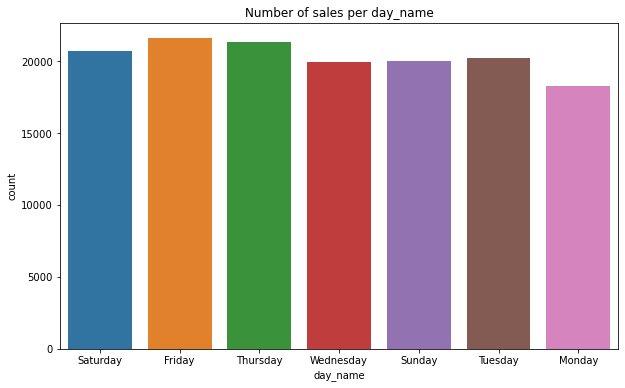

In [35]:
plt.figure(figsize=(10, 6))
plt.title('Number of sales per day_name')
sns.countplot(df['day_name']);

### How many `ticket_use` based on `day_name`?

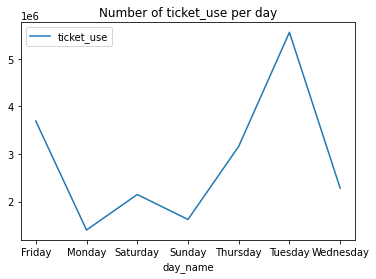

In [36]:
df[['ticket_use', 'day_name']].groupby(['day_name'], sort = True).sum().plot()
plt.title('Number of ticket_use per day');

### Which `film_code` has the most `tickets_sold`?


In [37]:
df[['film_code', 'tickets_sold']].groupby(['tickets_sold'], sort = True).sum()

,film_code
tickets_sold,
1,623465
2,3296778
3,2473993
4,3816933
5,3359522
...,...
7050,1554
7121,1554
7229,1554


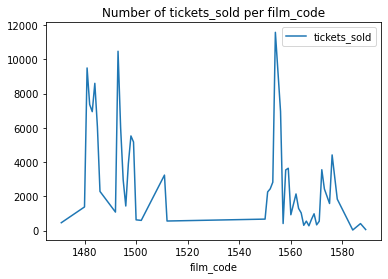

In [38]:
df[['film_code', 'tickets_sold']].groupby('film_code').count().plot()
plt.title('Number of tickets_sold per film_code');

### What is the correlation between the features?


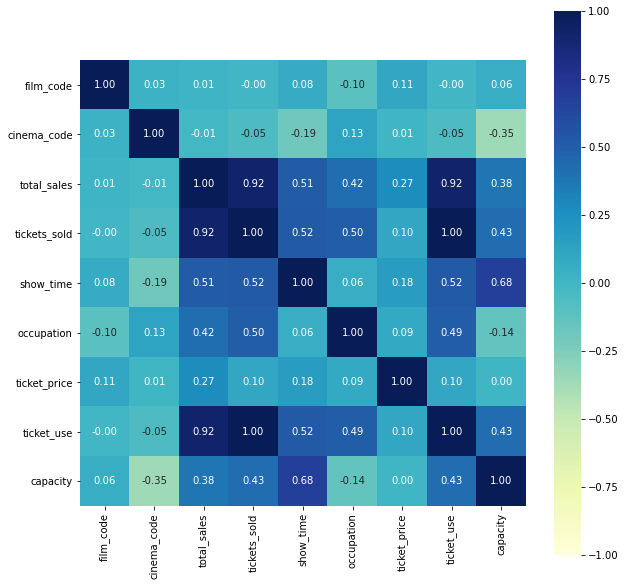

In [39]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), vmax = 1, vmin = -1, cmap = 'YlGnBu', cbar=True, annot=True, square=True, fmt='.2f', annot_kws = {'size': 10});

###  Does `show_time` affect the `tickets_sold`?

C:\Users\surface laptop\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


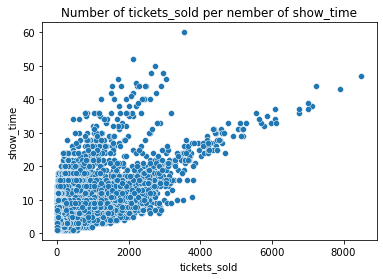

In [40]:
show = sns.scatterplot(df['tickets_sold'], df['show_time'])
show.set_title("Number of tickets_sold per nember of show_time");

###  Which `film_code` is the most popular film?

C:\Users\surface laptop\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


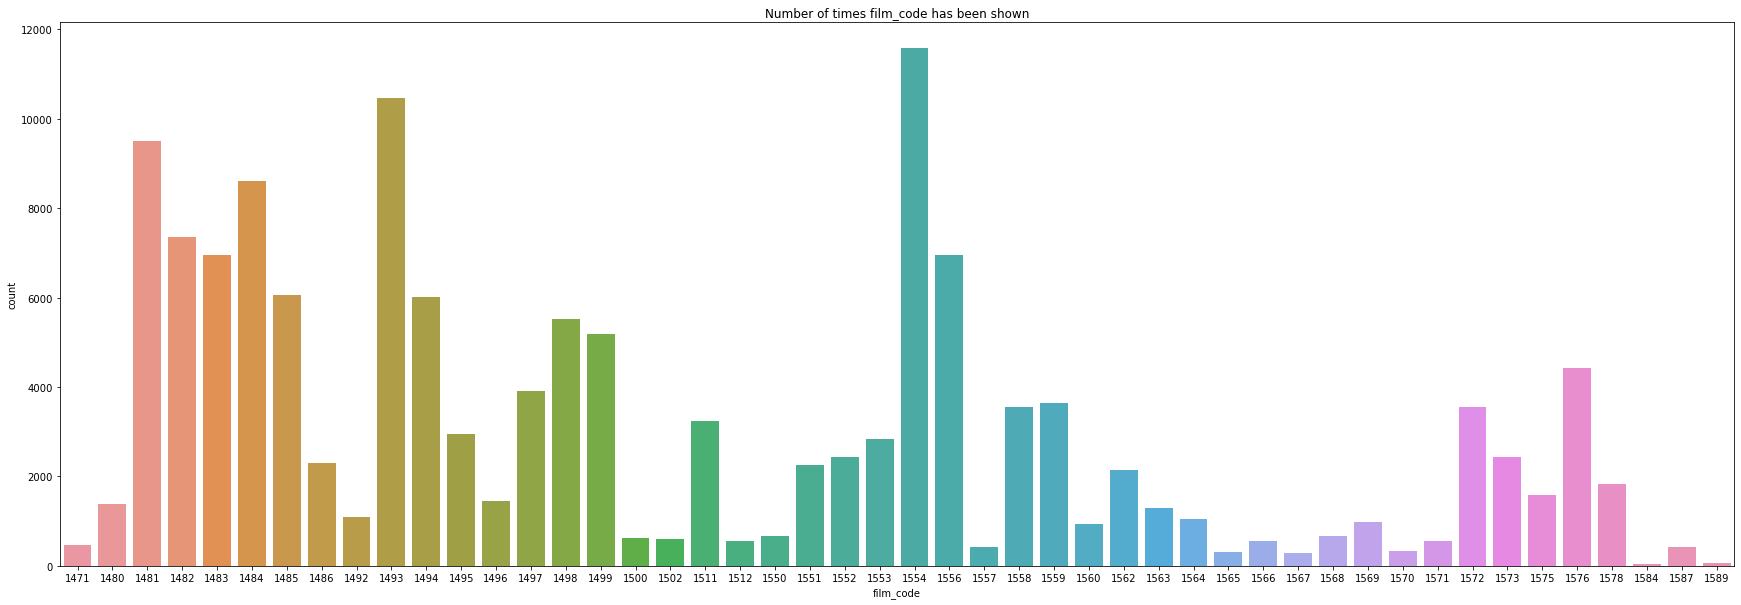

In [41]:
plt.figure(figsize=(30,10))
film = sns.countplot(df['film_code']);
film.set_title("Number of times film_code has been shown");

###  Which is the most popular Film show?

In [42]:
df.columns

Index(['film_code', 'cinema_code', 'total_sales', 'tickets_sold', 'show_time',
       'occupation', 'ticket_price', 'ticket_use', 'capacity', 'date',
       'day_name'],
      dtype='object')

# **Part 1: Machine Learning Model**

###  Define input and output columns

In [43]:
X = df.loc[:,['film_code', 'cinema_code', 'tickets_sold', 'show_time', 'occupation', 'ticket_price', 'ticket_use', 'capacity']]
y = df['total_sales']

In [44]:
X.head()

,film_code,cinema_code,tickets_sold,show_time,occupation,ticket_price,ticket_use,capacity
0,1492,304,26,4,4.26,150000.0,26,610.328638
1,1492,352,42,5,8.08,80000.0,42,519.801980
2,1492,489,32,4,20.00,80000.0,32,160.000000
3,1492,429,12,1,11.01,100000.0,12,108.991826
4,1492,524,15,3,16.67,80000.0,15,89.982004


In [45]:
y.head()

0    3900000
1    3360000
2    2560000
3    1200000
4    1200000
Name: total_sales, dtype: int64

###  Split dataset into train and test datasets

In [46]:
X, X_test, y, y_test = train_test_split(X, y, test_size=.2, random_state=10)

In [47]:
X_test.head()

,film_code,cinema_code,tickets_sold,show_time,occupation,ticket_price,ticket_use,capacity
128213,1493,524,168,9,8.92,80000.000000,168,1883.408072
40000,1562,50,17,3,3.18,120000.000000,17,534.591195
58255,1484,248,54,2,3.91,70000.000000,54,1381.074169
89219,1554,529,246,7,18.30,100731.707317,246,1344.262295
94381,1572,238,112,4,13.59,60000.000000,112,824.135394


In [48]:
y_test.head()

128213    13440000
40000      2040000
58255      3780000
89219     24780000
94381      6720000
Name: total_sales, dtype: int64

###  Split train dataset into train and vaidation datasets

In [49]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=.25, random_state=3)

###  Scale the vaules

In [50]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train.values)
X_val_scaled = scaler.transform(X_val.values)
X_test_scaled = scaler.transform(X_test.values)

###  Define the model

In [51]:
lr = LinearRegression()
lr.fit(X_train[['tickets_sold','show_time','ticket_use']], y_train)

LinearRegression()

###  r^2 score values for train and test dataset

In [52]:
print(f"The r^2 score value for train is {lr.score(X_train[['tickets_sold','show_time','ticket_use']], y_train)}")

print(f"The r^2 score value for test is {lr.score(X_test[['tickets_sold','show_time','ticket_use']], y_test)}")

The r^2 score value for train is 0.8354608114139351
The r^2 score value for test is 0.8450691174494454


###  Apply trained model to make predition on train dataset

In [53]:
y_actual_train = y_train
y_predicted_train = lr.predict(X_train[['tickets_sold','show_time','ticket_use']])

In [54]:
train_columns = {'actual': list(y_actual_train), 'predicted': list(y_predicted_train)}
train_table = pd.DataFrame(data = train_columns)
train_table.head()

,actual,predicted
0,4470000,1.368462e+07
1,14760000,9.804644e+06
2,131580000,1.108973e+08
3,100000,-2.541664e+06
4,10050000,1.741170e+07


###  Apply trained model to make predition on test dataset

In [55]:
y_actual_test = y_test
y_predicted_test = lr.predict(X_test[['tickets_sold','show_time','ticket_use']])

In [56]:
test_columns = {'actual': list(y_actual_test), 'predicted': list(y_predicted_test)}
test_table = pd.DataFrame(data = test_columns)
test_table.head()

,actual,predicted
0,13440000,1.733001e+07
1,2040000,-8.504756e+04
2,3780000,3.075328e+06
3,24780000,2.404087e+07
4,6720000,9.628050e+06


###  Calculating Mean Squared Error 

In [57]:
sqrt(mean_squared_error(y_actual_train, y_predicted_train))
sqrt(mean_squared_error(y_actual_test, y_predicted_test))
     
print(f"The MSE value of train dataset is {sqrt(mean_squared_error(y_actual_train, y_predicted_train))}")

print(f"The MSE value of test dataset is {sqrt(mean_squared_error(y_actual_test, y_predicted_test))}")

The MSE value of train dataset is 12257295.399118606
The MSE value of test dataset is 12294925.039599154


###  Print model performance

In [58]:
print('Coefficients:', lr.coef_)
print('Intercept:', lr.intercept_)
print('Coefficient of determination (R^2): %.2f'
      % r2_score(y_actual_test, y_predicted_test))

Coefficients: [101073.25961461 448097.81800642  -3546.94816218]
Intercept: -3087288.3069720306
Coefficient of determination (R^2): 0.85
